In [1]:

import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4]
                     ])

In [3]:
check=0
for el in raitings:
    result = 0
    rait=np.delete(raitings,(check), axis = 0)
    elrait=1
    for element in rait:
        a=np.linalg.norm(el)
        b=np.linalg.norm(element)
        cos = np.dot(el,element)/(a*b)
        if cos>result:
            result=cos
            elr=elrait
        elrait+=1
    check+=1
    print('Наибольшее сходство у '+str(check)+' пользователя с '+str(elr)+' пользователем')

Наибольшее сходство у 1 пользователя с 9 пользователем
Наибольшее сходство у 2 пользователя с 4 пользователем
Наибольшее сходство у 3 пользователя с 8 пользователем
Наибольшее сходство у 4 пользователя с 8 пользователем
Наибольшее сходство у 5 пользователя с 9 пользователем
Наибольшее сходство у 6 пользователя с 8 пользователем
Наибольшее сходство у 7 пользователя с 4 пользователем
Наибольшее сходство у 8 пользователя с 6 пользователем
Наибольшее сходство у 9 пользователя с 3 пользователем
Наибольшее сходство у 10 пользователя с 1 пользователем


In [4]:
#Как вариант можно взять средние значения по тройкам фильмов
check=1
sum_=0
new=[]

for elem in raitings:
    newprom=[]
    for el in elem:
        if check==3:
            sum_+=el
            sr=sum_/check
            newprom.append(sr)
            sum_=0
            check=1
        else:
            check+=1
            sum_+=el
    new.append(newprom)
print(new)
        
        

[[5.666666666666667, 3.6666666666666665, 8.666666666666666, 5.666666666666667, 6.666666666666667], [5.333333333333333, 8.333333333333334, 7.0, 3.0, 8.0], [5.0, 7.0, 7.0, 4.333333333333333, 5.0], [5.333333333333333, 7.666666666666667, 3.3333333333333335, 4.333333333333333, 4.0], [4.333333333333333, 7.0, 5.666666666666667, 4.0, 8.0], [6.0, 5.666666666666667, 5.666666666666667, 5.333333333333333, 5.0], [7.0, 8.666666666666666, 2.6666666666666665, 5.333333333333333, 3.6666666666666665], [3.6666666666666665, 5.666666666666667, 3.3333333333333335, 8.0, 4.666666666666667], [7.666666666666667, 8.0, 6.666666666666667, 8.666666666666666, 8.0], [5.333333333333333, 7.333333333333333, 8.333333333333334, 5.666666666666667, 7.0]]


In [7]:
New=[]
for element in raitings:
    NewMatr=[]
    for elem in raitings:
        new=np.dot(element,elem)
        NewMatr.append(new)
    New.append(NewMatr)

In [39]:
New
N=np.array(New)
N

array([[653, 566, 532, 434, 525, 462, 453, 458, 687, 652],
       [566, 719, 534, 492, 586, 541, 540, 475, 687, 620],
       [532, 534, 601, 450, 482, 473, 404, 414, 704, 564],
       [434, 492, 450, 470, 376, 416, 440, 398, 582, 472],
       [525, 586, 482, 376, 629, 475, 478, 451, 663, 618],
       [462, 541, 473, 416, 475, 595, 440, 456, 652, 551],
       [453, 540, 404, 440, 478, 440, 594, 446, 603, 554],
       [458, 475, 414, 398, 451, 456, 446, 490, 579, 495],
       [687, 687, 704, 582, 663, 652, 603, 579, 977, 789],
       [652, 620, 564, 472, 618, 551, 554, 495, 789, 785]])

In [28]:
x,z=np.linalg.eig(New)

In [47]:
z

array([[ 0.31657412,  0.33715914,  0.25954676, -0.32313099, -0.09207837,
         0.58851124, -0.0453819 , -0.31028639,  0.35054985,  0.19565304],
       [ 0.33479455, -0.28439058,  0.09199084,  0.12555894, -0.71806708,
         0.01702233, -0.18150051,  0.41496931,  0.00678089,  0.24841336],
       [ 0.30113006,  0.43803788, -0.32813535, -0.03784482, -0.28153805,
        -0.17930093,  0.21107187,  0.12257634,  0.22482495, -0.62193521],
       [ 0.26258518, -0.16639669, -0.46465087, -0.37843889, -0.16373246,
         0.03086391, -0.0415363 , -0.42376451, -0.57777422,  0.03686694],
       [ 0.30839361, -0.0323668 ,  0.52165829,  0.35126319, -0.10782477,
        -0.26888265,  0.43290107, -0.4435919 , -0.19314843, -0.05408417],
       [ 0.29426772, -0.12219603, -0.30949097,  0.66087703,  0.18528641,
         0.2003944 , -0.42629516, -0.26921722,  0.1648537 , -0.1003013 ],
       [ 0.28703131, -0.61511395,  0.07879957, -0.38595816,  0.21779322,
        -0.2720764 , -0.04045301, -0.07597346

In [52]:
raiting=np.dot(z,raitings)

In [54]:
#в целом вроде правильно РСА сделал, но не смог понять на какую матрицу нужно
#умножить собвственные вектора, что бы получить нужную матрицу (ниже сделал программно)
raiting

array([[  7.5478171 ,   8.49747769,   9.67722572,   8.13160325,
          9.3340643 ,   6.79790625,   7.18240388,  12.79371398,
         14.43008611,   8.35708982,   4.44355404,   7.36760707,
         11.10661236,  10.77135563,   6.85745108],
       [ -1.83591138,  -2.7578339 ,   4.97906479,  -1.67655627,
         -2.96128905,  -0.79624468,  -2.84270849,   1.63711365,
          4.25132807,   0.18007209,   6.77471229,   2.11549284,
         -1.48556447,  -2.6440169 ,  -0.89912   ],
       [  4.58284184,  -2.72887571,  -1.14024825,   0.99517814,
         -3.75485729,  -0.41374064,   0.84934517,  -4.43676831,
         -2.62549593,  -2.68592076,   0.14095855,   2.1930327 ,
         -1.55985596,  -1.6753821 ,   1.32117191],
       [ -8.31082179,  -9.77806084, -12.93988127, -14.13431651,
        -12.74396585, -17.10810499,  -5.43656255, -11.18665421,
        -11.04846811, -11.77711354,  -8.72963638, -14.18832699,
        -10.98791111,  -9.25111948, -12.96241463],
       [  2.14480666,   3.79

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
XPCAreduced = pca.fit_transform(transpose(raitings))

In [44]:
XPCAreduced

array([[ 7.20018322, -2.21180271,  0.62444472, -0.68347876,  2.32300969],
       [-2.15883915,  2.48811388,  2.50312108,  3.73949799,  5.59098759],
       [-2.19706704, -4.13054722,  1.20535636, -0.9375591 , -4.19604751],
       [ 2.17120509, -1.57353038,  1.91195496, -4.16844687,  2.21098853],
       [ 3.5042386 , -0.36007999, -1.29284485,  1.93382512,  3.06739434],
       [ 4.86816992, -1.68851078, -0.69183061, -2.33352131, -3.70024801],
       [ 1.36948218,  8.72739624,  1.45070841, -4.63509801, -1.14431162],
       [-5.39902839, -0.07301145, -3.41103106,  1.08503176, -0.70827974],
       [-6.79639997, -3.30287883, -1.0574357 , -1.65054982, -1.31930163],
       [-3.40627067,  1.72778736, -3.15588866,  5.01530221, -0.24360856],
       [ 0.19121604,  1.25414218,  9.08646082,  4.81528688, -3.61505649],
       [ 3.19399673, -7.51517242, -2.06544701,  1.76874451,  0.42454085],
       [-4.32784434,  2.39265736, -1.77898224, -3.22047502,  0.80977053],
       [ 4.94145693,  5.40830066, -5.4

In [30]:
from scipy.misc import derivative
from sympy import *

In [6]:
def f(x):
    return pow(tan(sin(x)+cos(2*x+3)),2)

In [7]:
x=Symbol('x')
x=1

In [8]:
f1=derivative(f,1.0)
f1

57.0653126946030

In [9]:
#Производная на бумаге
2tg(cos(2x+3)+sin(x))*(tg(cos(2x+3)+sin(x))'
(2tg(cos(2x+3)+sin(x)))/(pow(cos(cos(2x+3)+sin(x)),2))*(cos(2x+3)+sin(x))'
proizv=(2(cos(x)-2sin(2x+3))*tg(cos(2x+3)+sin(x)))/pow(cos(cos(2x+3)+sin(x)),2)                       

SyntaxError: invalid syntax (<ipython-input-9-528e329f5ddf>, line 2)

In [10]:
def z(x):
    return (2*(cos(x)-2*sin(2*x+3))*tan(cos(2*x+3)+sin(x)))/pow(cos(cos(2*x+3)+sin(x)),2) 

In [11]:
func=derivative(z,1.0,n=0)
func

55.3859176353379

In [56]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [69]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [58]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

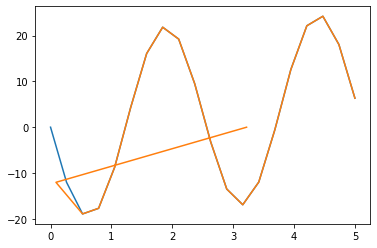

In [74]:
plt.plot(x, fx)
#plt.plot(func.x,fx)
plt.show()

In [67]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [72]:
?minimize

In [70]:
func=minimize(error,x)

In [71]:
func

      fun: 235.02677458725543
 hess_inv: array([[ 1.69775189e-09, -1.11054385e-10,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.11054385e-10,  4.39142884e-11,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00

In [73]:
func.x

array([3.22024996, 0.08906684, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [24]:
len(Sum)

1000

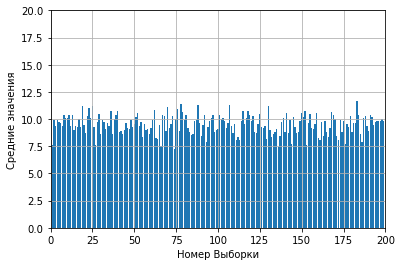

In [27]:
i=1
Summary=[]
for i in range(1000):
    Mas=[]
   
    for a in range(50):
        S=randint(0,20)
        Mas.append(S)
    Sr=sum(Mas)/len(Mas)
    Summary.append(Sr)
Sum=np.array(Summary)
plt.bar(range(1000),Sum)
plt.xlabel('Номер Выборки')
plt.ylabel('Средние значения')
plt.xlim(0,200)
plt.ylim(0,20)
plt.grid(True)
plt.show()


In [10]:
from math import *
from numpy.random import randint

In [61]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [63]:
m

array([[1, 4],
       [1, 1]])

In [32]:
x,z=np.linalg.eig(m)

In [33]:
for i in range(len(x)):
    print("Собственное значение " + str(x[i]))
    print("соответствующий ему собственный вектор " + str(z[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


In [66]:
#Найдем на бумаге
m*([[x],[y]])=L([[x],[y]])
([[x+4y],[x+y]])=)([[Lx],[Ly]])
x+4y-Lx=0, x+y-Ly=0
(1-L)x+4y=0 , (1-L)+x=0
(1-L)(1-L)-4=0
1-2L+L*L-4=0
L2-2L-3=0
D=4+12=16
L1=(2-4)/2=-1
L2=(2+4)/2=3
#Собственные значения (-1,3), при значении =3 получим:
-2x+4y=0, x-2y=0 ==> x=-2y ==> СВ1=(1,-2)
#При значении =-1:
2х+4у=0, х+2у=0 ==> x=2y ==> CB2=(1,2)



SyntaxError: invalid syntax (<ipython-input-66-bef3ef079f0f>, line 3)